## Credit card customer segmentation

### by Chirapa Muadchan

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

### Objectives
- To divide customers into distinctive groups in order to launch different marketing campaigns to the right customers according to their behaviors.

### Loading libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
credit_df = pd.read_csv('Marketing_data.csv')

### Important features of the dataset

- CUSTID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [3]:
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit_df.shape

(8950, 18)

In [5]:
# Mean balance is $1564 
mean_balance = credit_df['BALANCE'].mean()
print('MEAN BALANCE =','$', round(mean_balance))
# Balance frequency is frequently updated on average ~0.9
balance_freq = credit_df['BALANCE_FREQUENCY'].mean()
print('BALANCE_FREQUENCY =',round(balance_freq))
# Purchases average is $1000
purc_avg = credit_df['PURCHASES'].mean()
print('PURCHASES_AVG =', '$',round(purc_avg))
# one off purchase average is ~$600
oneof_avg = credit_df['ONEOFF_PURCHASES'].mean()
print('ONEOFF_PURCHASES_AVG =','$',round(oneof_avg))
# Average purchases frequency is around 0.5
purc_freq = credit_df['PURCHASES_FREQUENCY'].mean()
print('PURCHASES_FREQUENCY =', round(purc_freq))

# # average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# oneof_avg = credit_df['ONEOFF_PURCHASES'].mean()
# print(round(oneof_avg))

# Average credit limit ~ 4500
credit_limit = credit_df['CREDIT_LIMIT'].mean()
print('CREDIT_LIMIT_AVG =','$',round(credit_limit))

# Percent of full payment is 15%
#full_pay = credit_df['PAYMENTS'].sum()
#print(round(full_pay))

# Average tenure is 11 years
year_avg = credit_df['TENURE'].mean()
print('TENURE =', year_avg, 'years')

MEAN BALANCE = $ 1564
BALANCE_FREQUENCY = 1
PURCHASES_AVG = $ 1003
ONEOFF_PURCHASES_AVG = $ 592
PURCHASES_FREQUENCY = 0
CREDIT_LIMIT_AVG = $ 4494
TENURE = 11.51731843575419 years


In [6]:
credit_df.describe() ## statistic summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
max_oneoff= credit_df['ONEOFF_PURCHASES'].max()
max_oneoff

40761.25

In [8]:
# The person who made the maximum one off purchase.
max_purc_person = credit_df[credit_df['ONEOFF_PURCHASES'] == max_oneoff]
max_purc_person

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
max_cashadv = credit_df['CASH_ADVANCE'].max()
print('The maximum advance cash made:','$',round(max_cashadv,2))

The maximum advance cash made: $ 47137.21


In [10]:
# The person who made made the maximum cash advance. 
max_cash_adv = credit_df[credit_df['CASH_ADVANCE'] == max_cashadv]
max_cash_adv

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


- This customer made 123 cash advance transactions and never paid credit card in full.

### Data Exploration

<AxesSubplot:>

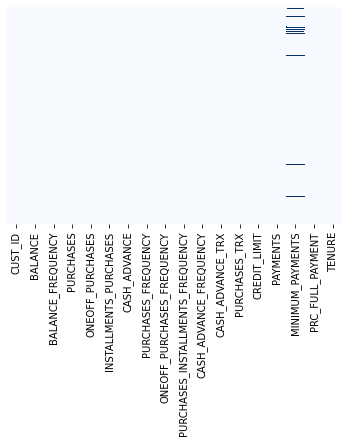

In [11]:
## Check if there is any missing value?
sns.heatmap(credit_df.isnull(), yticklabels=False, cbar = False, cmap ='Blues')

In [12]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- We can see that there are 313 of missing values from 'MINIMUM_PAYMENTS' column 'MINIMUM_PAYMENTS' and 1 missing value from 'CREDIT_LIMIT' column.

In [13]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
credit_df.loc[(credit_df['MINIMUM_PAYMENTS'].isnull()== True), 'MINIMUM_PAYMENTS']= credit_df['MINIMUM_PAYMENTS'].mean() 

In [14]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
credit_df.loc[(credit_df['CREDIT_LIMIT'].isnull()== True), 'CREDIT_LIMIT']= credit_df['CREDIT_LIMIT'].mean() 

- Then we will be taking care of the missing values from 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' column by using <b>mean of those columns.

In [15]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- Now, there is no more missing value.

In [16]:
# Let's see if we have duplicated entries in the data
credit_df.duplicated().sum()

0

- We also have to check the duplicates of the datasets.

In [17]:
# Let's drop Customer ID since it has no meaning here 
credit_df = credit_df.drop(['CUST_ID'], axis =1)
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- Then we can drop the customer id column when it is not useful for the analysis anymore.

In [18]:
n = len(credit_df.columns)
n

17

In [19]:
credit_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

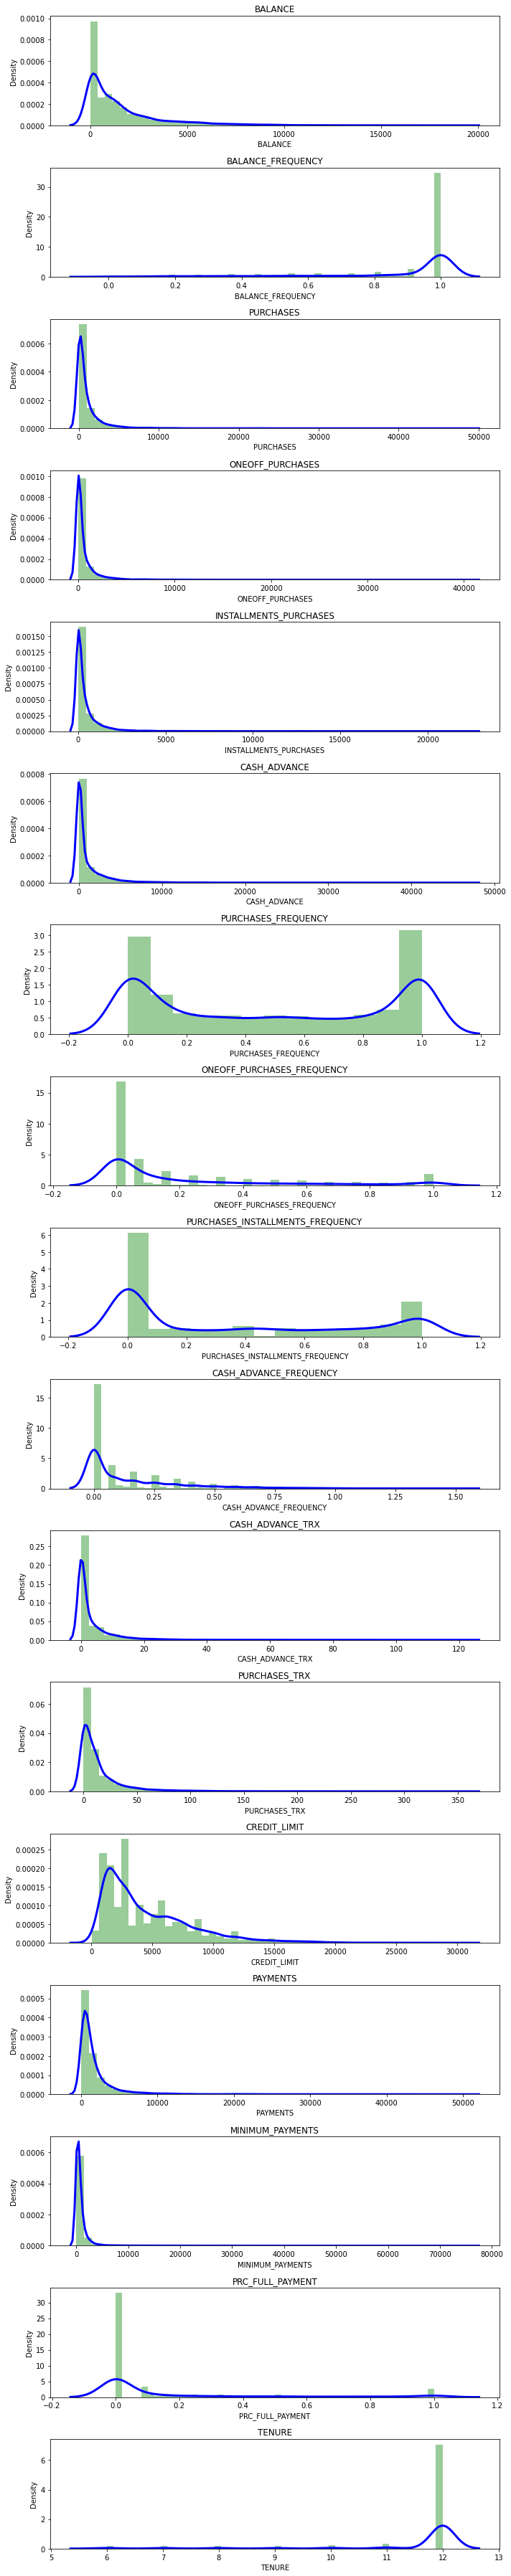

In [20]:
# distplot combines the matplotlib.hist function with seaborn kdeplot() 
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 
plt.figure(figsize= (10,50))
for i in range(len(credit_df.columns)):
  plt.subplot(17,1, i+1)
  sns.distplot(credit_df[credit_df.columns[i]],kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws ={'color':'g'} )
  plt.title(credit_df.columns[i])
plt.tight_layout()



From the KDE plots above we can clearly see that,

- Mean of balance is $1500.

- 'Balance_Frequency' for most customers is updated frequently ~1

- For 'PURCHASES_FREQUENCY', there are two distinct group of customers

-  For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or - installment purchases frequently 

- Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

- Credit limit average is around $4500

- Most customers are ~11 years tenure

In [21]:
corr = credit_df.corr()

- Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
- Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

<AxesSubplot:>

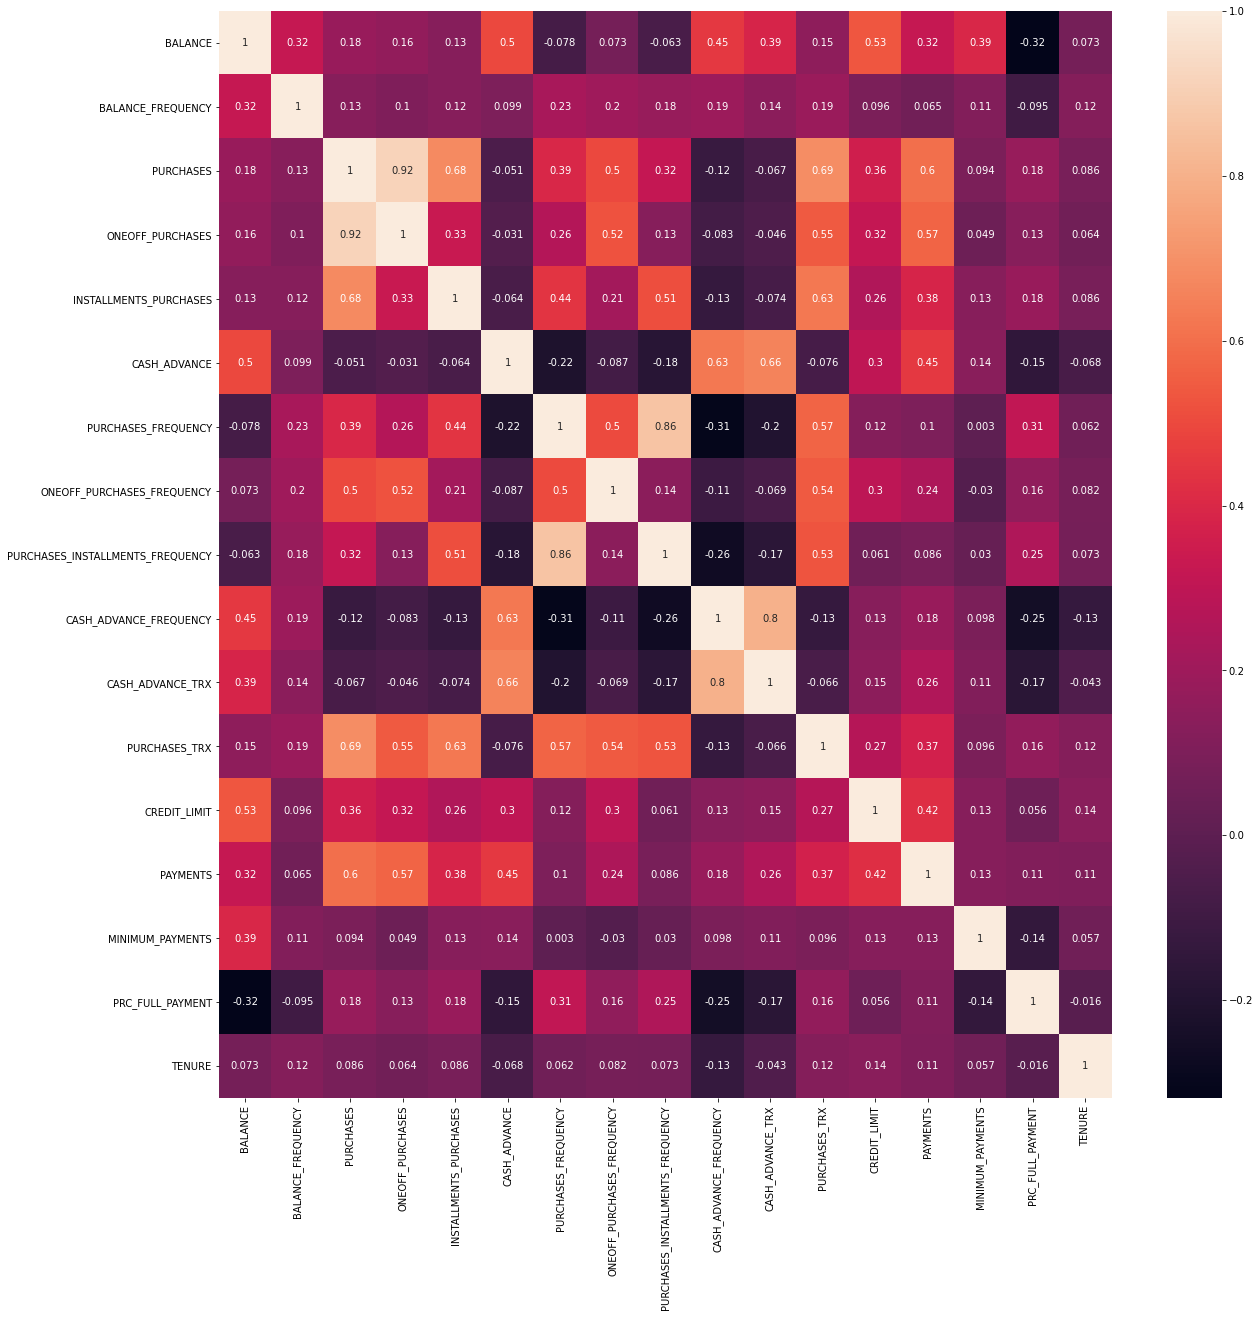

In [22]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot = True)

#### From the corrrlation plot we can see that,
- There is a strong correlation between 'CASH_ADVANCE_FREQUENCY' (the frequently the cash in advance being paid) and 'CASH_ADVANCE_TRX' (the number of transactions made with "Cash in Advance").
- 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
- There is a strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'.

### K-means implementation

In [23]:
scaler = StandardScaler()
credit_df_scaled = scaler.fit_transform(credit_df)

Firstly, we have to scale the data for........

In [24]:
credit_df_scaled.shape

(8950, 17)

In [25]:
credit_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [26]:
score_1 = []
range_val = range(1,20)
for i in range_val:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(credit_df_scaled)
  score_1.append(kmeans.inertia_)


Text(0, 0.5, 'Scores WCSS')

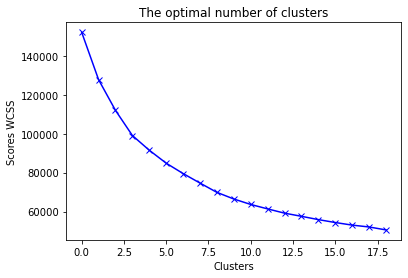

In [27]:
plt.plot(score_1, 'bx-')
plt.title('The optimal number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')

- From this we can observe that, 4th cluster seems to be forming the elbow of the curve. However, the values does not reduce linearly until 8th cluster. 
Then, Let's choose the number of clusters to be 7.

In [28]:
kmeans = KMeans(8)
kmeans.fit(credit_df_scaled)
labels = kmeans.labels_

In [29]:
labels

array([0, 5, 1, ..., 6, 6, 6], dtype=int32)

In [30]:
kmeans.cluster_centers_.shape         

(8, 17)

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_df.columns])
cluster_centers     

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.014632,0.403892,-0.357504,-0.241785,-0.401000,-0.094605,-0.855407,-0.394833,-0.757007,0.104224,-0.027607,-0.482335,-0.303769,-0.250342,-0.005564,-0.455544,0.273361
1,-0.132219,0.400633,0.542369,0.671849,0.047936,-0.328219,0.981832,1.906996,0.172341,-0.411431,-0.328093,0.620644,0.436127,0.148878,-0.157808,0.447508,0.268526
2,1.054293,0.468804,2.449551,1.783721,2.514977,-0.161134,1.169439,1.542654,1.280411,-0.284558,-0.151568,3.103658,1.278140,1.417111,0.736943,0.243059,0.337784
3,-0.701215,-2.139409,-0.310202,-0.234619,-0.302316,-0.322522,-0.554262,-0.441259,-0.440150,-0.521634,-0.376396,-0.419230,-0.176045,-0.201790,-0.257018,0.283849,0.201369
4,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
5,1.682091,0.391863,-0.219584,-0.155886,-0.232879,2.019692,-0.477889,-0.209753,-0.419310,1.924788,1.930124,-0.270131,1.025421,0.820437,0.509079,-0.390634,0.068842
6,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
7,-0.363878,0.332971,-0.035704,-0.241339,0.358770,-0.362744,0.988688,-0.380796,1.199460,-0.473523,-0.360201,0.187095,-0.258903,-0.214983,-0.052064,0.310841,0.256671


In [32]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1594.930633,0.972949,239.392053,191.123524,48.448682,780.479438,0.147034,0.084671,0.063583,0.156000,3.060430,2.720786,3389.212474,1008.428444,851.240310,0.020476,11.883145
1,1289.271781,0.972177,2161.984084,1707.568543,454.415541,290.580478,0.884407,0.771352,0.432930,0.052813,1.009830,30.136729,6081.257616,2164.130897,496.440733,0.284603,11.876676
2,3758.896529,0.988326,6236.707354,3553.048078,2685.330585,640.966451,0.959703,0.662661,0.873305,0.078201,2.214485,91.855153,9144.846797,5835.541113,2581.621078,0.224805,11.969359
3,104.954052,0.370465,340.454239,203.017919,137.687420,302.527006,0.267898,0.070822,0.189510,0.030760,0.680203,4.289340,3853.925080,1148.980637,265.237883,0.236736,11.786802
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,5065.605895,0.970099,534.059735,333.698618,200.478249,5214.260387,0.298550,0.139884,0.197793,0.520314,16.420507,7.995392,8225.350859,4108.228688,2050.593199,0.039461,11.609447
6,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
7,807.093769,0.956148,926.922187,191.864309,735.498786,218.179516,0.887159,0.088859,0.841133,0.040387,0.790721,19.360316,3552.453209,1110.789343,742.874234,0.244630,11.860809


In [33]:
labels.shape # Labels associated to each data point

(8950,)

In [34]:
labels.max()

7

In [35]:
labels.min()

0

In [36]:
y_kmeans = kmeans.fit_predict(credit_df_scaled)
y_kmeans

array([5, 0, 3, ..., 7, 7, 7], dtype=int32)

In [37]:
# concatenate the clusters labels to our original dataframe
credit_df_cluster = pd.concat([credit_df, pd.DataFrame({'cluster': labels})], axis =1) 
credit_df_cluster.head(6)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,7


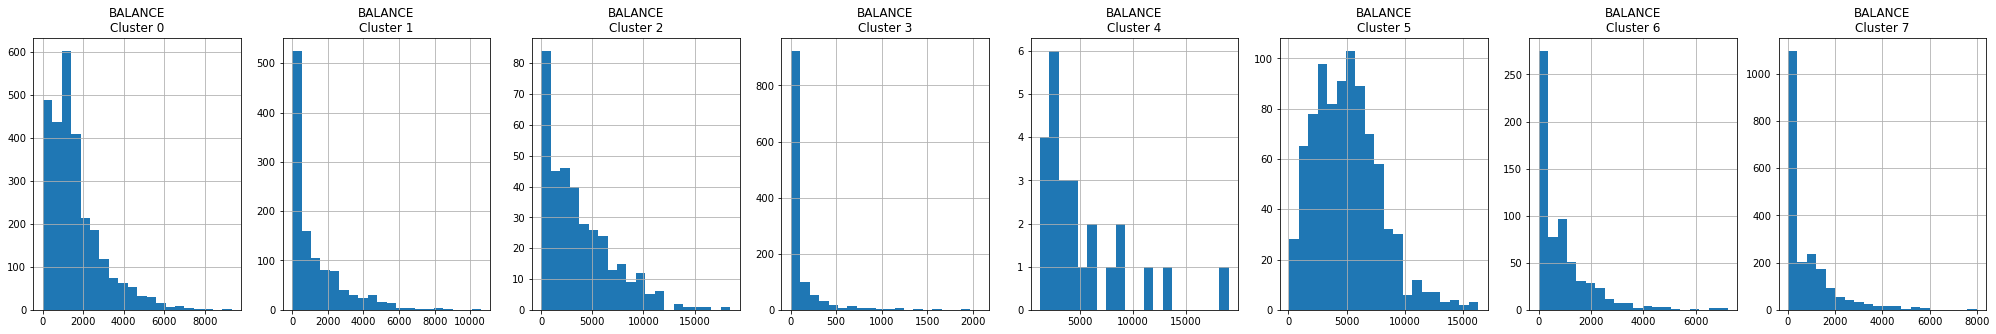

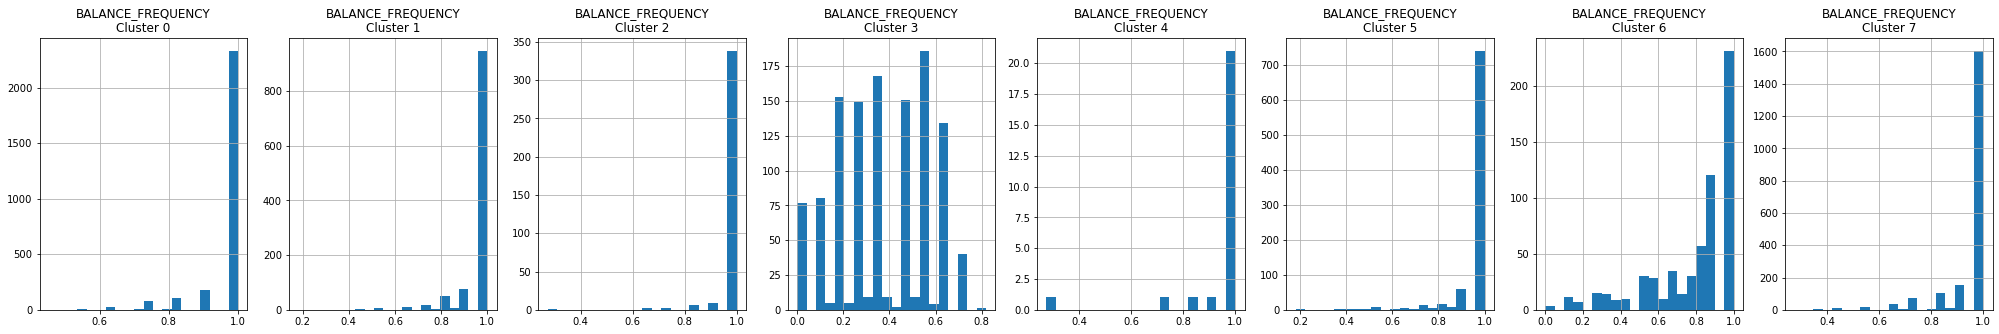

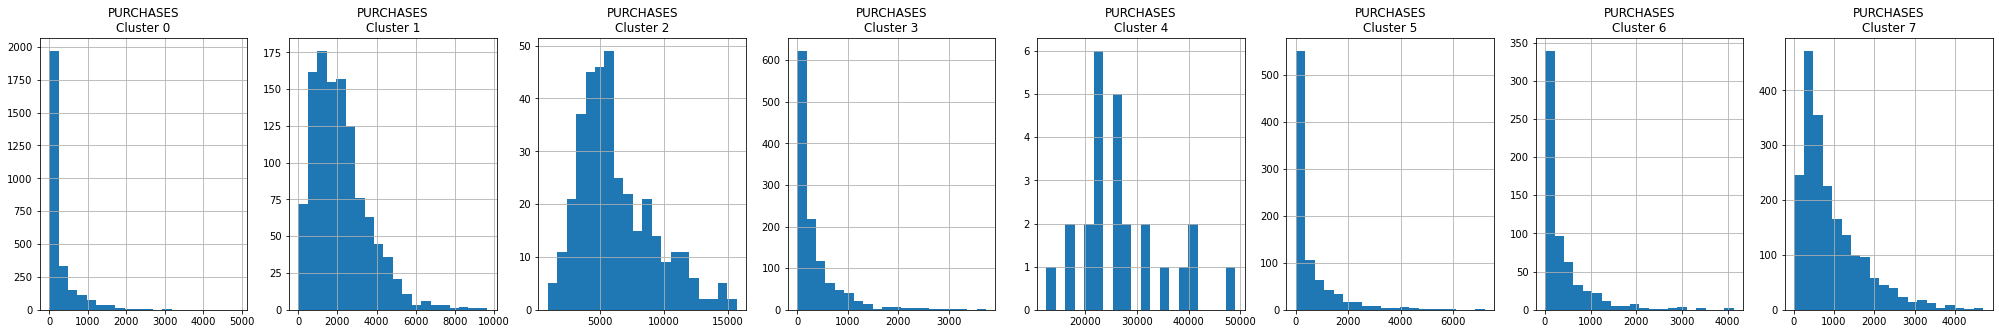

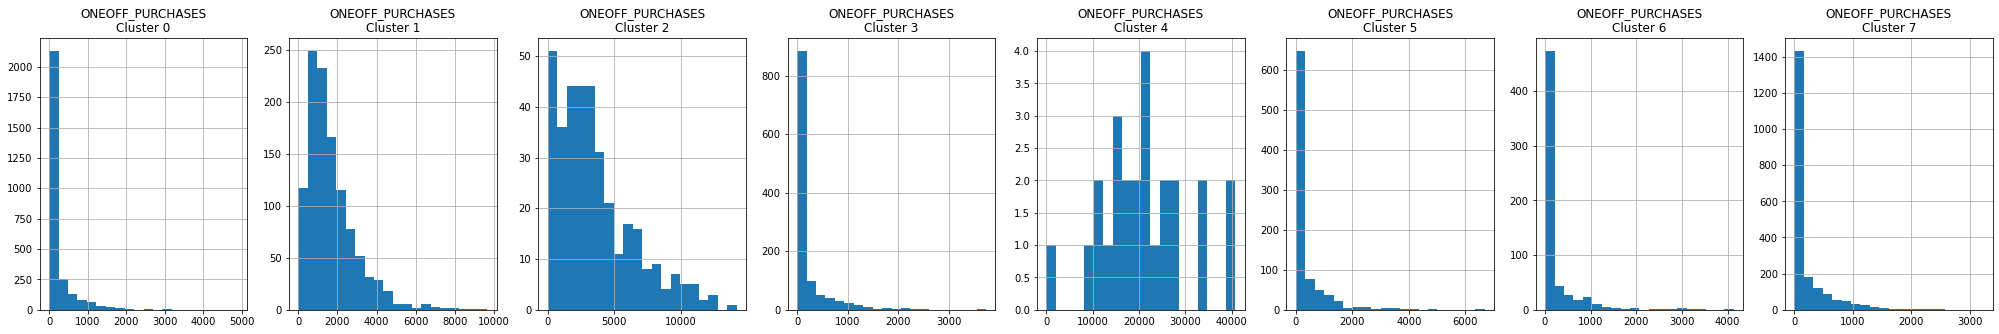

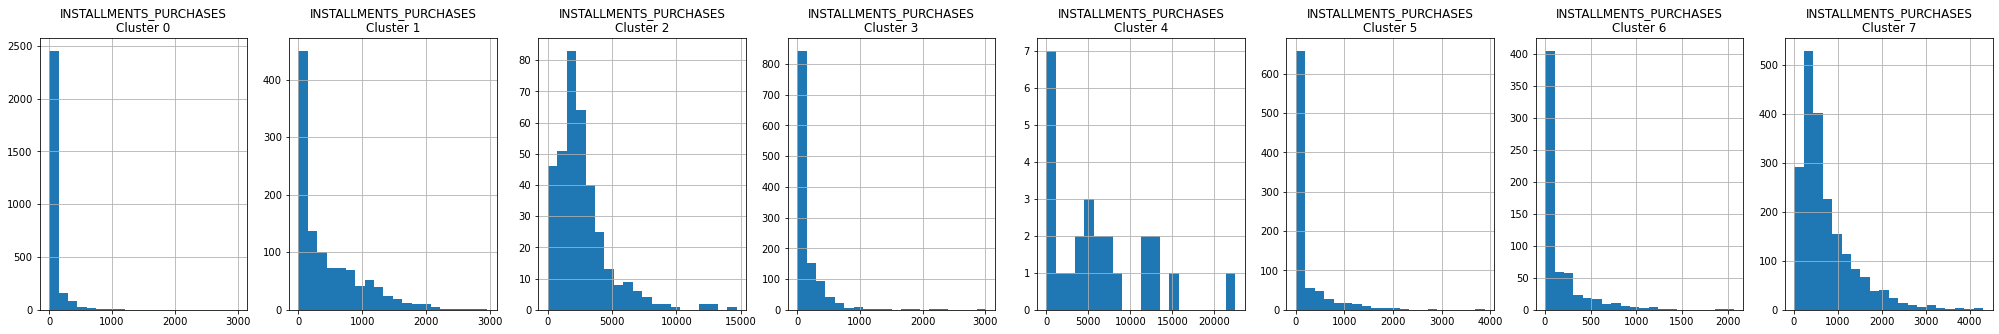

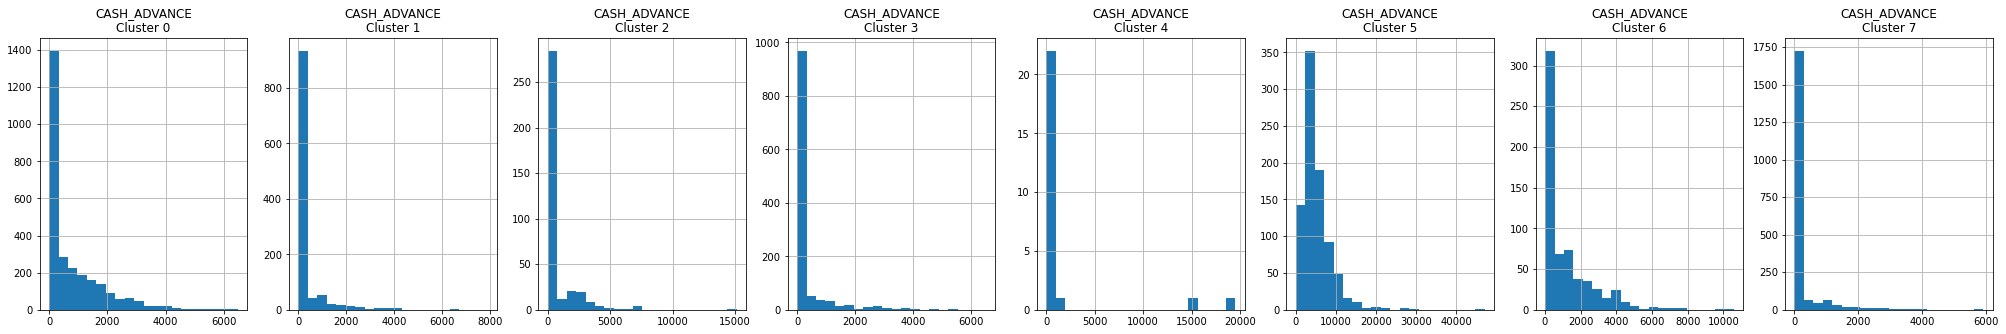

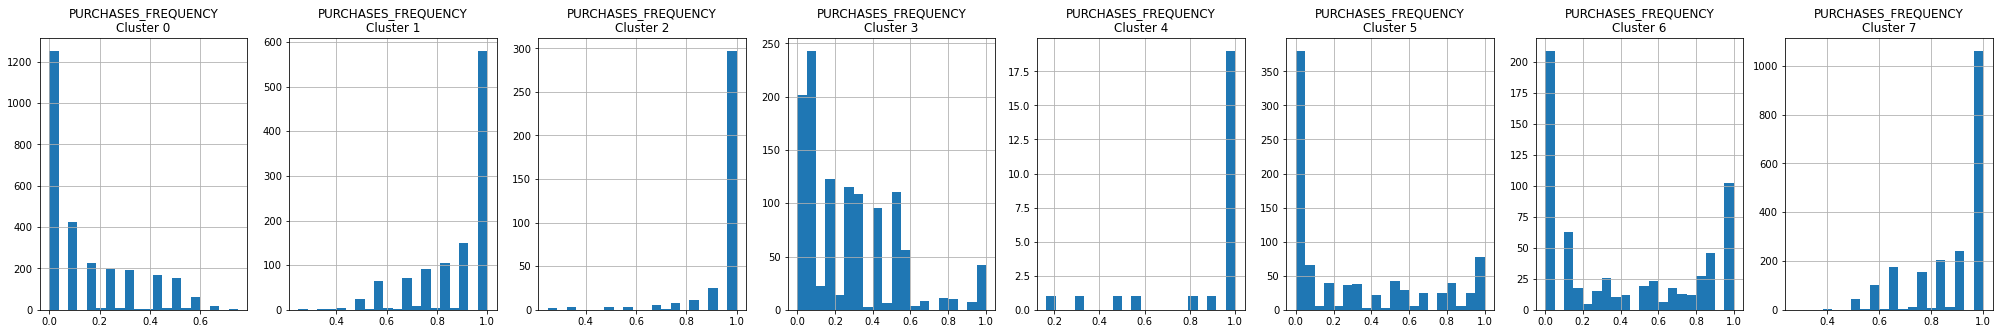

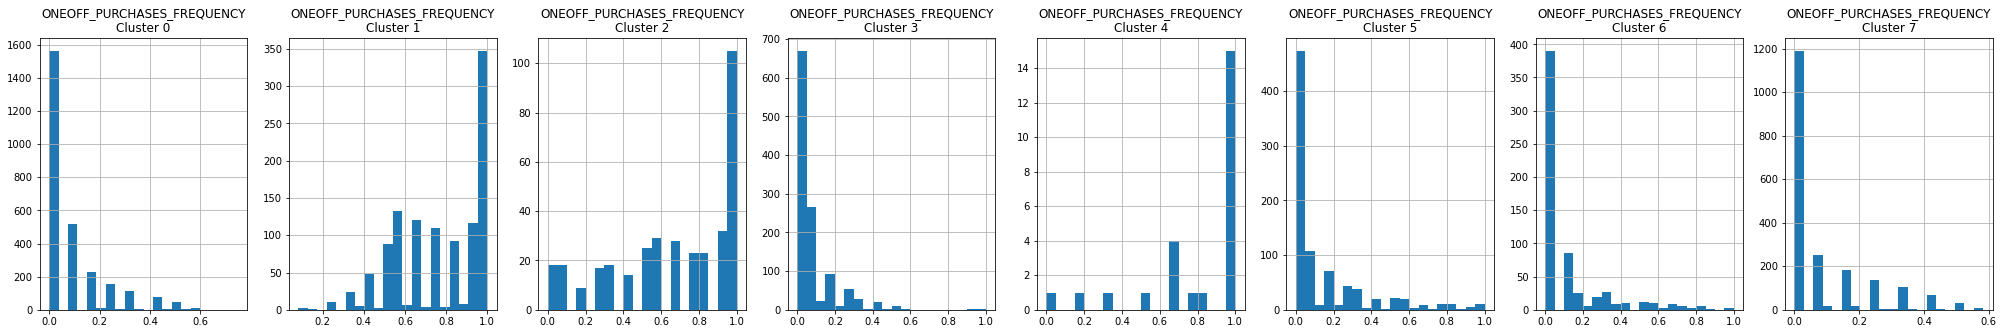

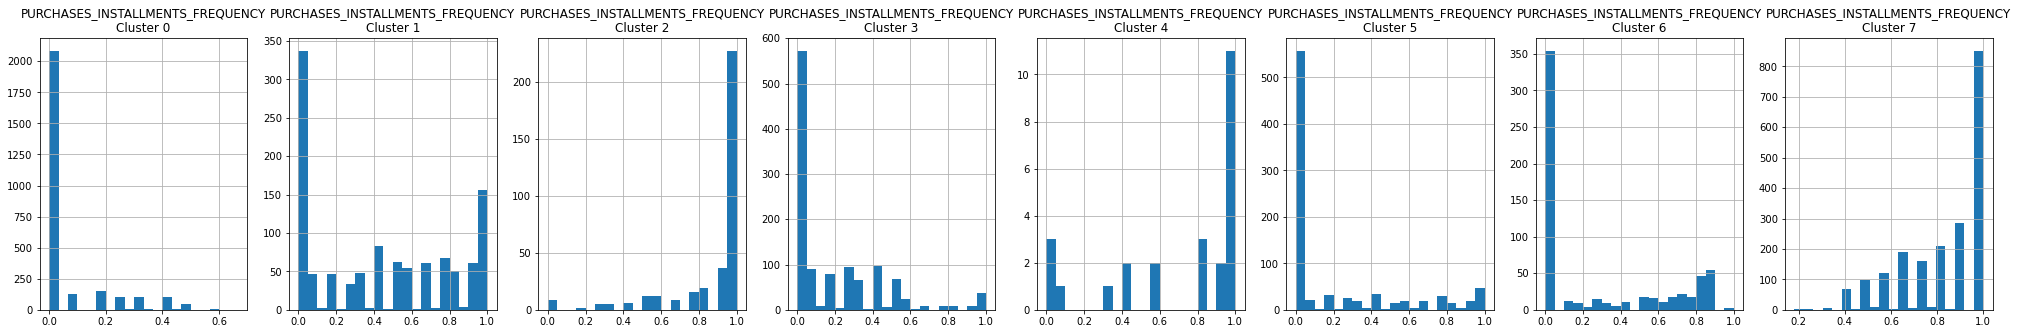

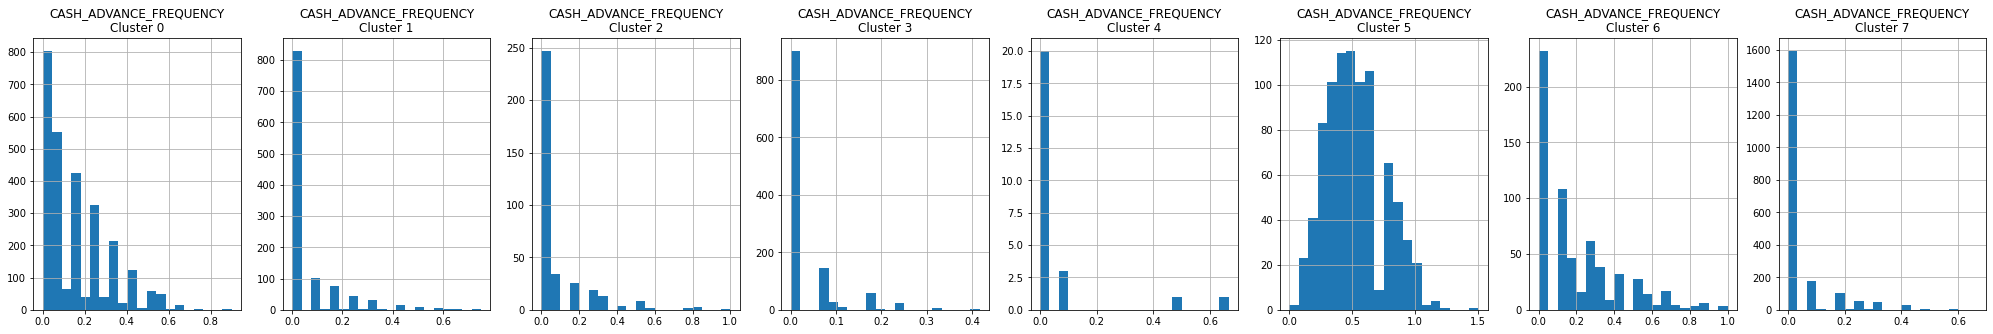

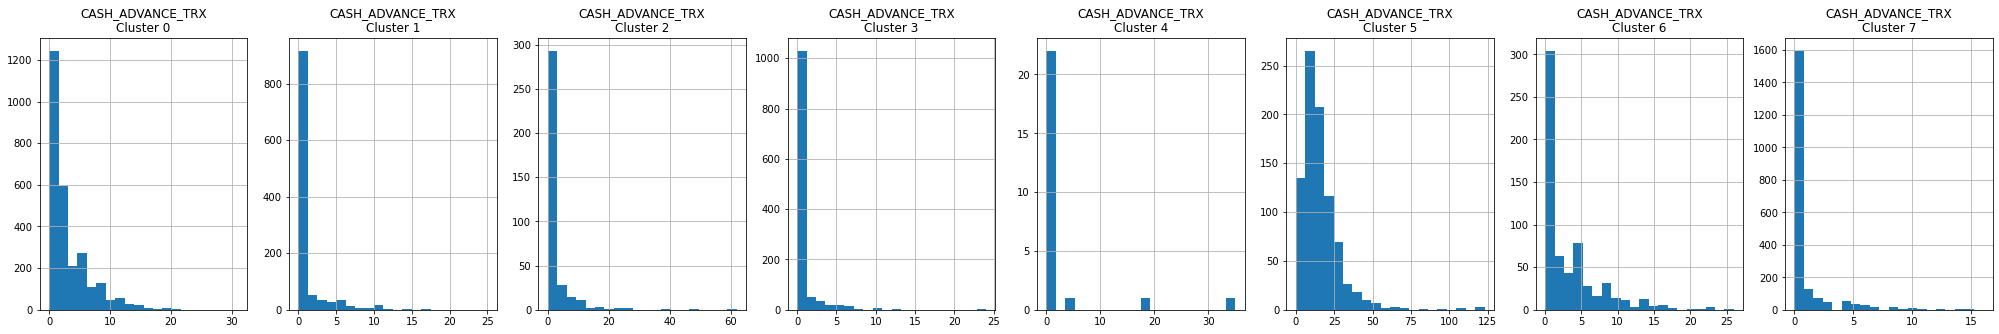

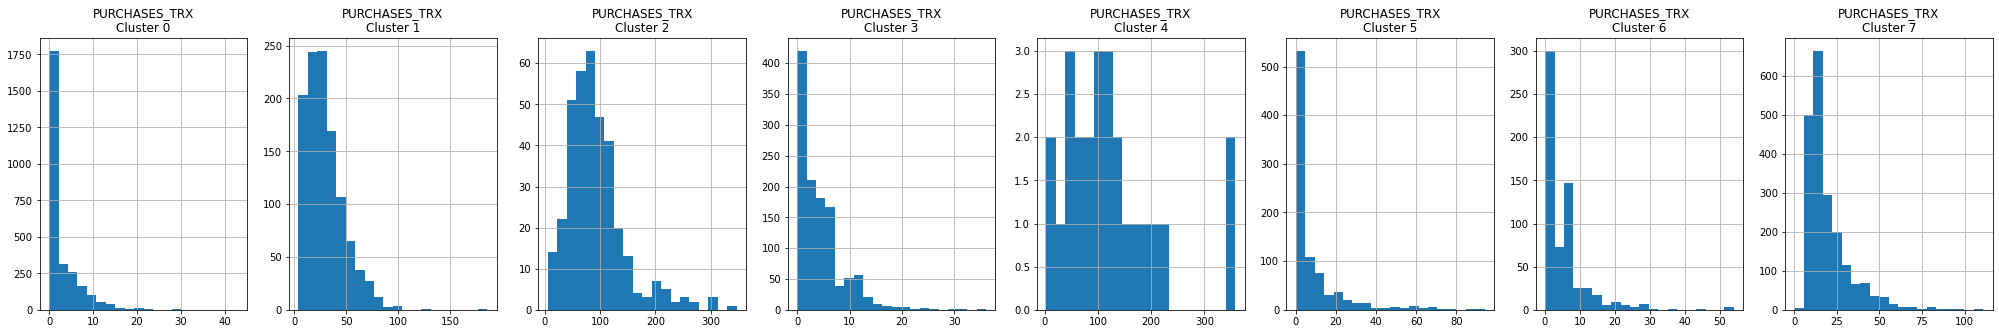

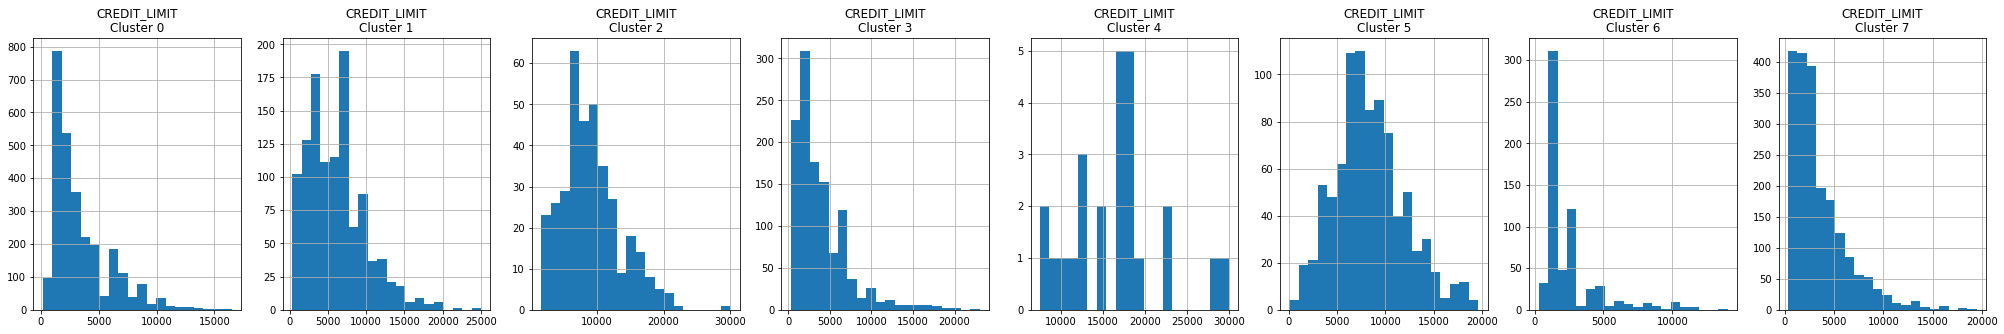

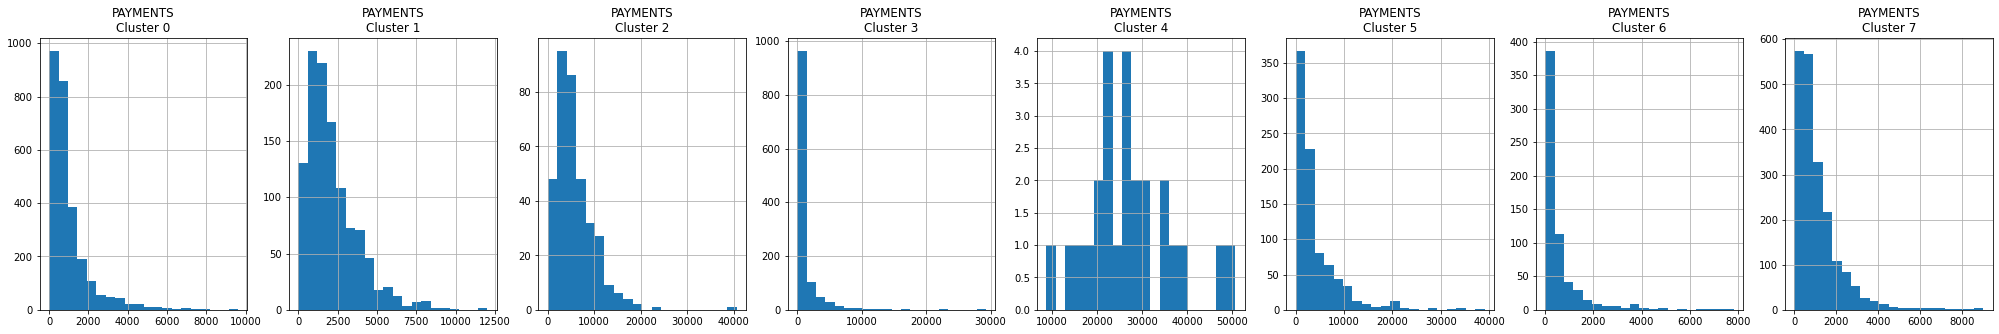

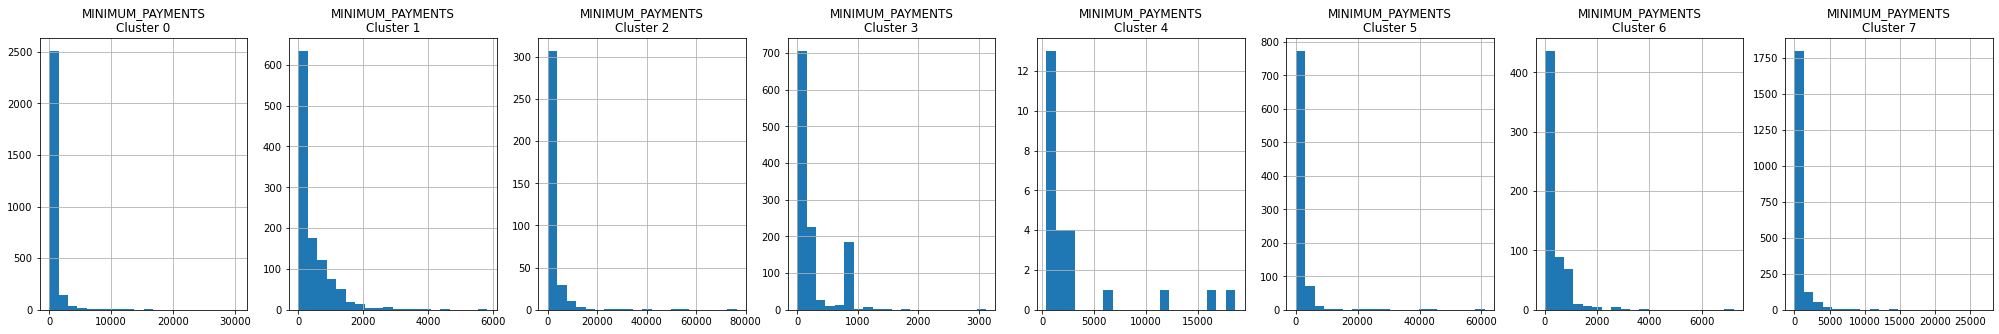

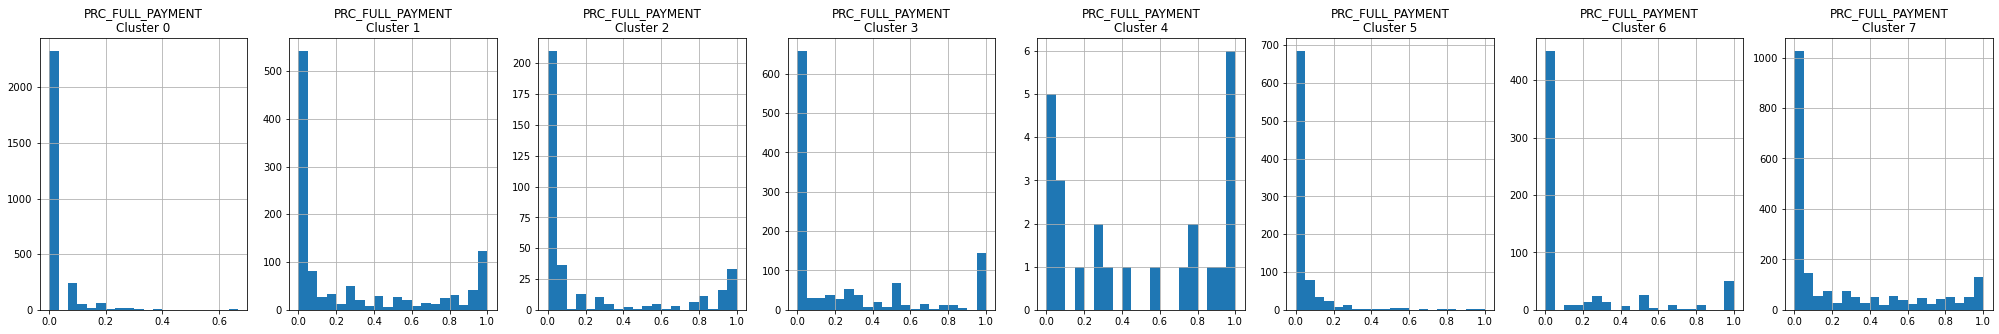

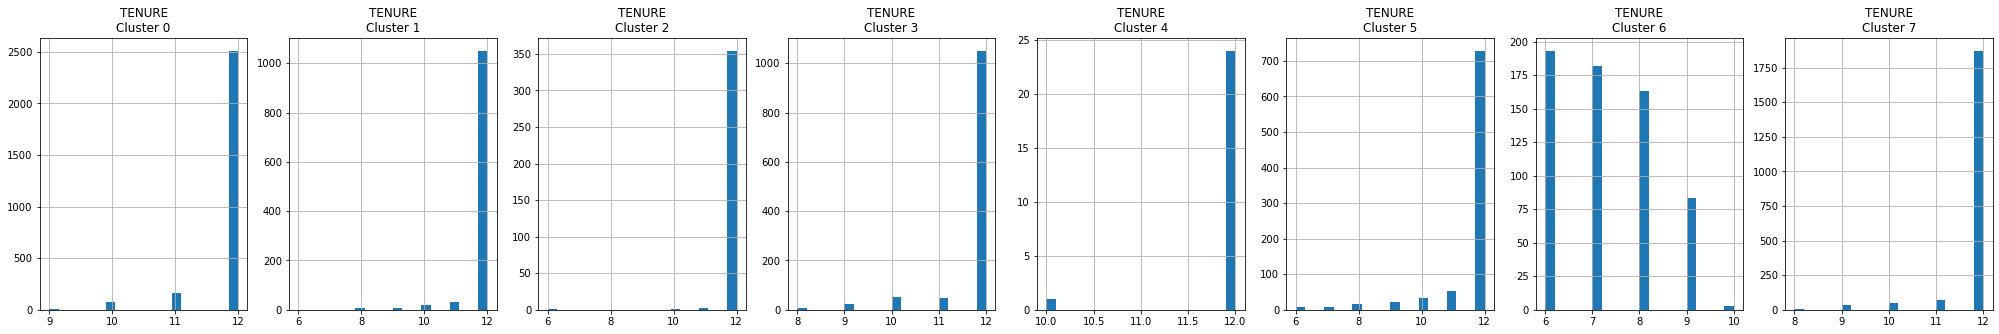

In [38]:
# Plot the histogram of various clusters
for i in credit_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8, j+1)
    cluster = credit_df_cluster[credit_df_cluster['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {}'.format(i,j))
plt.show()

### Implementing the principal component analysis (PCA)

In [39]:
# Obtain the principal components 
pca = PCA(n_components = 2) ## compress the data into 2 components
principle_comp = pca.fit_transform(credit_df_scaled)
principle_comp

array([[-1.6822208 , -1.07645321],
       [-1.13829776,  2.50646957],
       [ 0.96968061, -0.3835259 ],
       ...,
       [-0.9262026 , -1.81078506],
       [-2.33654926, -0.65796211],
       [-0.55642125, -0.40046158]])

In [40]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principle_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138298,2.506470
2,0.969681,-0.383526
3,-0.873629,0.043162
4,-1.599434,-0.688582


In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis =1) 
pca_df.head()  

,pca1,pca2,cluster
0,-1.682221,-1.076453,0
1,-1.138298,2.506470,5
2,0.969681,-0.383526,1
3,-0.873629,0.043162,0
4,-1.599434,-0.688582,0


- Concatenate the clusters labels to the dataframe with the reduced dimension data (2 components).

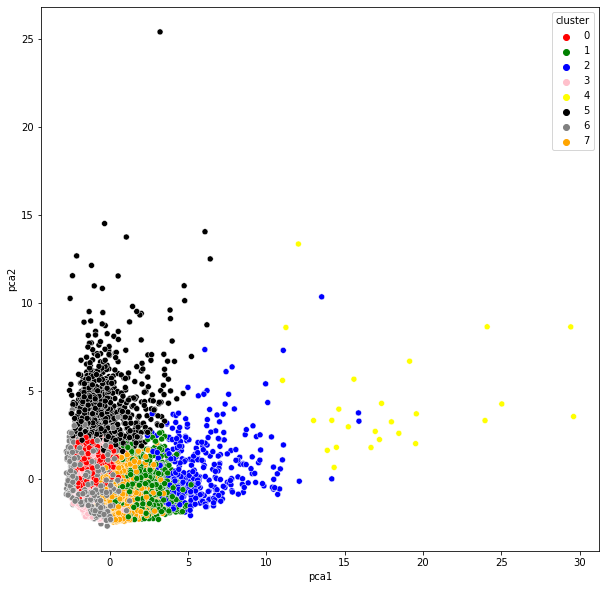

In [42]:
plt.figure(figsize=(10,10))
ax =sns.scatterplot(x='pca1', y='pca2', hue ='cluster', data = pca_df, palette=['red','green','blue','pink', 'yellow','black', 'grey','orange'])

- It still can not divide customers into distinctive groups.

### Applying autoencoders to perform dimensionality reduction.

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform ## draw samples from trucate normalized distribution
#from keras.optimizers import SGD
## kera = building our model


In [44]:
encoding_dim = 7 ## select 7 dimension
input_df = Input(shape = (17,)) ## 17 features

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
x = Dense(encoding_dim, activation='relu')(input_df) ## select 7 dimension, activation fn = relu --> linear unit
x = Dense(500,activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500,activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000,activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000,activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500,activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


## Dense -- Fully connected layers

In [45]:
credit_df_scaled.shape

(8950, 17)

In [46]:
autoencoder.fit(credit_df_scaled, credit_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 1s 12ms/step - loss: 0.5557
Epoch 2/25
70/70 [==============================] - 1s 12ms/step - loss: 0.2925
Epoch 3/25
70/70 [==============================] - 1s 12ms/step - loss: 0.2316
Epoch 4/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1833
Epoch 5/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1650
Epoch 6/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1428
Epoch 7/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1307
Epoch 8/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1209
Epoch 9/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1047
Epoch 10/25
70/70 [==============================] - 1s 13ms/step - loss: 0.0929
Epoch 11/25
70/70 [==============================] - 1s 13ms/step - loss: 0.0864
Epoch 12/25
70/70 [==============================] - 1s 15ms/step - loss: 0.0808
Epoch 13/25
70/70 [==================

In [47]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [48]:
autoencoder.save_weights('autoencoder.h5')

In [49]:
pred = encoder.predict(credit_df_scaled)

In [50]:
pred.shape

(8950, 10)

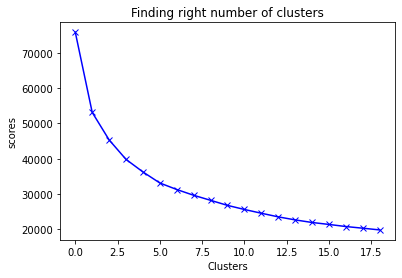

In [51]:
score_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  score_2.append(kmeans.inertia_)

plt.plot(score_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

- The optimal number of clusters is 4.

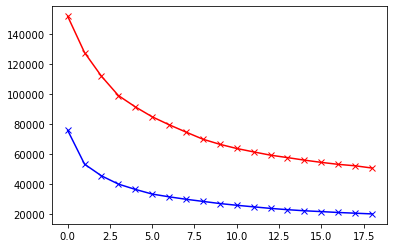

In [52]:
plt.plot(score_1, 'bx-', color = 'r')## the original data
plt.plot(score_2, 'bx-', color = 'b')## the compressed data
## comparing the number of clusters from the original features and the reduced one.

- The optimal number of clusters is 4

### Applying k-means algorithm after the encoders

In [53]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(credit_df_scaled)

- After we reduced the dimension of data, we could find the optimal number of clusters which is 4. 

- We got less numbers of the clusters from the original data.

In [54]:
df_cluster_dr = pd.concat([credit_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Applying PCA

In [55]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.080405,0.031226
1,0.713954,1.463739
2,-0.601907,-0.144656
3,-0.545279,0.260888
4,-2.065569,0.103215


In [56]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.080405,0.031226,1
1,0.713954,1.463739,2
2,-0.601907,-0.144656,1
3,-0.545279,0.260888,1
4,-2.065569,0.103215,1


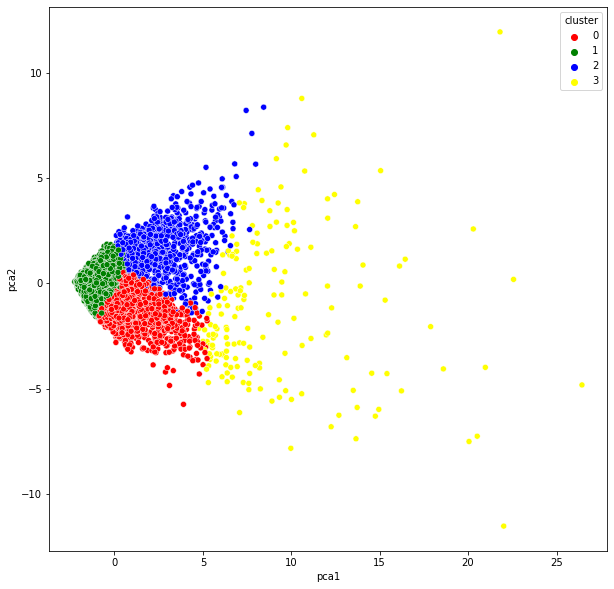

In [57]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

- Now we have only 4 groups of customers to target.